In [116]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
from lazyft.command_parameters import HyperoptParameters
from lazyft.downloader import download_missing_historical_data
import pandas as pd

days = 365
starting_balance = 100
max_open_trades = 7
stake_amount = 25
interval = '15m'
use_custom_stoploss = False
# binance = Config('binance_refresh_december.json')
# bin_us = Config("config.binanceus.json")

h_params = HyperoptParameters(
    epochs=50,
    config_path='config.json',
    days=days,
    spaces="buy sell",
    # loss='ROIAndProfitHyperOptLoss',
    loss='CalmarHyperOptLoss',
    interval=interval,
    min_trades=100,
    starting_balance=starting_balance,
    max_open_trades=max_open_trades,
    stake_amount=stake_amount,
    jobs=-2,
    download_data=True,
    custom_spaces='',
    custom_settings={
        'use_custom_stoploss': use_custom_stoploss,
        'timeframe':           interval
    },
    tag='auto',
)

# download_missing_historical_data(intervals=['4h'], pairs=h_params.pairs, config=h_params.config, parameters=h_params)

In [124]:
from lazyft.command_parameters import BacktestParameters

b_params = BacktestParameters(
    # timerange="20200101-",
    config_path='config.json',
    days=days,
        interval='4h',
    timerange='20210315-20211113',
    stake_amount='unlimited',
    starting_balance=starting_balance,
    max_open_trades=max_open_trades,
    # timeframe_detail='4h',
    download_data=True,
    tag="",
)
b_params.run('Hodl')

2022-03-15 18:09:24,782 - indicatormix.parameter_tools:71 - INFO - Creating buy comparison groups. Skip groups: [1, 2, 3]
2022-03-15 18:09:24,783 - indicatormix.parameter_tools:80 - WARNING - Skip groups are the same as number of groups. No groups will be created.
2022-03-15 18:09:24,783 - indicatormix.parameter_tools:49 - INFO - Created 0 buy comparison groups.
2022-03-15 18:09:24,784 - indicatormix.parameter_tools:71 - INFO - Creating sell comparison groups. Skip groups: [1, 2, 3]
2022-03-15 18:09:24,785 - indicatormix.parameter_tools:55 - INFO - Created 3 sell comparison groups.


2022-03-15 18:09:24.806 | INFO     | lazyft.downloader:download_missing_historical_data:274 - Checking if download is needed for SAND/USDT, MANA/USDT, SOL/USDT, LTC/USDT, TRX/USDT, AVAX/USDT, XRP/USDT @ 4h interval(s)
2022-03-15 18:09:24.817 | SUCCESS  | lazyft.downloader:download_missing_historical_data:311 - Data is up to date
2022-03-15 18:09:24.881 | INFO     | lazyft.parameter_tools:remove_params_file:36 - Removing strategy params: /home/raphael/PycharmProjects/ftworkdir/user_data/strategies/hodl.json
2022-03-15 18:09:24.983 | INFO     | lazyft.strategy:save_strategy_text_to_database:172 - Strategy Hodl already in database...skipping


2022-03-15 18:09:27,462 - indicatormix.parameter_tools:71 - INFO - Creating buy comparison groups. Skip groups: [1, 2, 3]
2022-03-15 18:09:27,463 - indicatormix.parameter_tools:80 - WARNING - Skip groups are the same as number of groups. No groups will be created.
2022-03-15 18:09:27,464 - indicatormix.parameter_tools:49 - INFO - Created 0 buy comparison groups.
2022-03-15 18:09:27,464 - indicatormix.parameter_tools:71 - INFO - Creating sell comparison groups. Skip groups: [1, 2, 3]
2022-03-15 18:09:27,465 - indicatormix.parameter_tools:55 - INFO - Created 3 sell comparison groups.


2022-03-15 18:09:27.499 | INFO     | lazyft.backtest.runner:pre_execute:180 - Running command: "freqtrade backtesting -c /home/raphael/PycharmProjects/ftworkdir/configs/config.json --user-data-dir /home/raphael/PycharmProjects/ftworkdir/user_data --strategy-path /home/raphael/PycharmProjects/ftworkdir/user_data/strategies --timerange 20210315-20211113 --pairs SAND/USDT MANA/USDT SOL/USDT LTC/USDT TRX/USDT AVAX/USDT XRP/USDT --starting-balance 100 --stake-amount unlimited --max-open-trades 7 --timeframe 4h -s Hodl"
2022-03-15 18:09:27.500 | INFO     | lazyft.backtest.runner:pre_execute:183 - Backtesting Hodl with params id "null" - 8ac8d12cb395eb6404c4e1912f194f39
Result for strategy Hodl
============================================================ BACKTESTING REPORT ============================================================
|      Pair |   Buys |   Avg Profit % |   Cum Profit % |   Tot Profit USDT |   Tot Profit % |       Avg Duration |   Win  Draw  Loss  Win% |
|-----------+--------

In [114]:
h_params.timerange

'20210315-20211113'

In [3]:
from freqtrade.configuration import TimeRange
from freqtrade.data.history import load_pair_history

candles = {}

# for p in h_params.pairs:
for p in ['BTC/USDT']:
    c = load_pair_history(datadir=h_params.user_data_dir.joinpath('data', h_params.config.exchange),
                          timeframe='4h',
                          pair=p,
                          data_format="json",
                          # timerange=TimeRange.parse_timerange(h_params.timerange)
                          )
    candles[p] = c

len(candles)

1

In [5]:
for pair, candle in candles.items():
    # add column with rate of change percentage
    candle['roc'] = (candle['close'] - candle['open']) / candle['open']
    print(candle.head())
    print(candle.tail())

                       date  open  high   low  close  volume    roc
0 2021-01-10 00:00:00+00:00 40.1K 41.4K 40.1K  40.3K   11.8K  0.006
1 2021-01-10 04:00:00+00:00 40.3K 41.1K   40K    41K   9.17K  0.016
2 2021-01-10 08:00:00+00:00   41K 41.1K 38.9K  39.2K   18.8K -0.044
3 2021-01-10 12:00:00+00:00 39.2K 40.1K 38.4K  39.7K   17.1K  0.013
4 2021-01-10 16:00:00+00:00 39.7K 39.8K 37.1K  37.5K   26.1K -0.056
                          date  open  high   low  close  volume    roc
2196 2022-01-11 00:00:00+00:00 41.8K 42.4K 41.5K  42.3K   4.93K  0.011
2197 2022-01-11 04:00:00+00:00 42.3K 42.4K   42K  42.2K   3.88K -0.002
2198 2022-01-11 08:00:00+00:00 42.2K 42.6K 41.6K  41.8K   6.07K -0.010
2199 2022-01-11 12:00:00+00:00 41.8K 42.2K 41.3K  41.7K   7.35K -0.002
2200 2022-01-11 16:00:00+00:00 41.7K 43.1K 41.7K    43K   11.9K  0.030


In [6]:
# create an empty dataframe with index as date
df = pd.DataFrame(index=list(candles.values())[0].date)

# for each date in df, combine the roc values for all pairs
for date in df.index:
    # get the combined roc from all pairs for this date
    total = 0
    for pair, candle in candles.items():
        # get the roc for this date
        try:
            roc = candle.loc[candle['date'] == date, 'roc'].values[0]
        except KeyError:
            print(f"{pair} does not have data for {date}")
            continue
        except IndexError:
            print(f"{pair} does not have data for {date}")
            continue
        # add it to the total
        total += roc
    # set the combined roc for this date
    df.loc[date, 'combined_roc'] = total


In [7]:
# sum the combined roc for each date
df['combined_roc_sum'] = df['combined_roc'].cumsum()

In [17]:
# get worst streak of days with negative combined roc
negative_streaks = []
start_date = None

# resample to weekly and sum the combined roc
df_weekly = df.resample('W').sum()
# negative
for date in df_weekly.index:
    roc = df_weekly.loc[date, 'combined_roc']
    if roc < 0:
        if start_date is None:
            start_date = date
    else:
        if not start_date:
            continue
        negative_streaks.append((start_date.to_pydatetime(), date.to_pydatetime()))
        start_date = None
# postive
positive_streaks = []
for date in df_weekly.index:
    roc = df_weekly.loc[date, 'combined_roc']
    if roc > 0:
        if start_date is None:
            start_date = date
    else:
        if not start_date:
            continue
        positive_streaks.append((start_date.to_pydatetime(), date.to_pydatetime()))
        start_date = None

# longest = sorted_streaks[-1]
# longest_as_timedelta = longest[1] - longest[0]
# print(
#     f'The longest streak of negative combined roc is {longest_as_timedelta}, from {longest[0].date()} to {longest[1].date()}')
#
# second_longest = sorted_streaks[-2]
# second_longest_as_timedelta = second_longest[1] - second_longest[0]
# print(
#     f'The second longest streak of negative combined roc is {second_longest_as_timedelta}, from {second_longest[0].date()} to {second_longest[1].date()}')
# third_longest = sorted_streaks[-3]
# third_longest_as_timedelta = third_longest[1] - third_longest[0]
# print(
#     f'The third longest streak of negative combined roc is {third_longest_as_timedelta}, from {third_longest[0].date()}-{third_longest[1].date()}')
sorted_positive_streaks = sorted(positive_streaks, key=lambda x: (x[1] - x[0]).days, reverse=True)
for i in range(0, 3):
    # turn to YYYYMMDD
    start = sorted_positive_streaks[i][0].date().strftime('%Y%m%d')
    end = sorted_positive_streaks[i][1].date().strftime('%Y%m%d')
    print(f'The {i+1} longest streak of positive combined roc is {(sorted_positive_streaks[i][1] - sorted_positive_streaks[i][0]).days} days, from {start}-{end}')
print()
sorted_negative_streaks = sorted(negative_streaks, key=lambda x: (x[1] - x[0]).days, reverse=True)
for i in range(0, 3):
    # turn to YYYYMMDD
    start = sorted_negative_streaks[i][0].date().strftime('%Y%m%d')
    end = sorted_negative_streaks[i][1].date().strftime('%Y%m%d')
    print(f'The {i+1} longest streak of negative combined roc is {(sorted_negative_streaks[i][1] - sorted_negative_streaks[i][0]).days} days, from {start}-{end}')

The 1 longest streak of positive combined roc is 35 days, from 20210725-20210829
The 2 longest streak of positive combined roc is 28 days, from 20210131-20210228
The 3 longest streak of positive combined roc is 21 days, from 20210530-20210620

The 1 longest streak of negative combined roc is 21 days, from 20210110-20210131
The 2 longest streak of negative combined roc is 21 days, from 20211121-20211212
The 3 longest streak of negative combined roc is 14 days, from 20210321-20210404


<AxesSubplot:xlabel='date'>

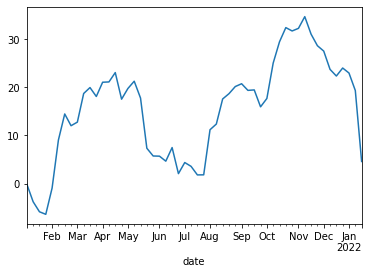

In [9]:
df_weekly.combined_roc_sum.plot(kind='line')

<AxesSubplot:xlabel='date'>

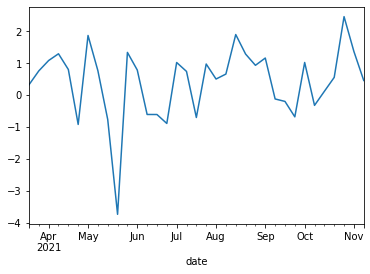

In [125]:
df_weekly.combined_roc.plot(kind='line')

In [88]:
dir(start_date)
start_date.to_pydatetime()

datetime.datetime(2022, 2, 12, 4, 0, tzinfo=<UTC>)